By Muhammad Agung Hambali

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-08 08:56:24--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.7MB/s    in 64s     

2020-05-08 08:57:29 (4.84 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissor_dir = os.path.join(base_dir, 'scissors')

In [4]:
#Simpan pathnya ke list
rock_list = os.listdir(rock_dir)
paper_list = os.listdir(paper_dir)
scissor_list = os.listdir(scissor_dir)

print('jumlah gambar batu', len(rock_list))
print('jumlah gambar kertas', len(paper_list))
print('jumlah gambar gunting', len(scissor_list))

jumlah gambar batu 726
jumlah gambar kertas 712
jumlah gambar gunting 750


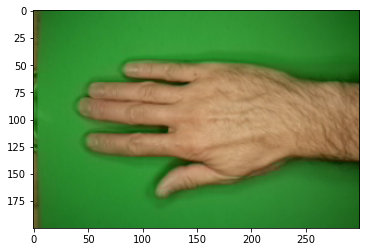

In [5]:
#contoh gambar
sample_picture = os.path.join(paper_dir, paper_list[5])
img_sample = mpimg.imread(sample_picture)
plt.imshow(img_sample)
plt.show()

In [6]:
#augmentasi gambar
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   validation_split = 0.3,
                                   zoom_range = 0.1,
                                   height_shift_range = 0.1,
                                   width_shift_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True)
                                  

train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size = 100,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150),
                                                    color_mode = 'rgb',
                                                    subset = 'training')
val_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size = 75,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150),
                                                    color_mode = 'rgb',
                                                    subset = 'validation')

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [0]:
model = keras.models.Sequential()
#First Layer
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu',input_shape = (150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.3))

#Second Layer
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.3))

#Third Layer
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

#Flatten dan Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(3, activation = 'softmax'))

In [0]:
optimizer = RMSprop(lr = 0.005, rho = 0.9)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

In [9]:
model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=8,
      validation_data=val_generator,
      validation_steps=15, 
      verbose=2)

Epoch 1/8
100/100 - 73s - loss: 26.1798 - accuracy: 0.4873 - val_loss: 3.0928 - val_accuracy: 0.4371
Epoch 2/8
100/100 - 71s - loss: 0.6167 - accuracy: 0.7862 - val_loss: 0.7194 - val_accuracy: 0.6470
Epoch 3/8
100/100 - 73s - loss: 0.2629 - accuracy: 0.9225 - val_loss: 0.5001 - val_accuracy: 0.8138
Epoch 4/8
100/100 - 73s - loss: 0.1865 - accuracy: 0.9504 - val_loss: 0.6712 - val_accuracy: 0.7548
Epoch 5/8
100/100 - 74s - loss: 0.1304 - accuracy: 0.9606 - val_loss: 1.0284 - val_accuracy: 0.6688
Epoch 6/8
100/100 - 74s - loss: 0.1069 - accuracy: 0.9698 - val_loss: 0.1913 - val_accuracy: 0.9622
Epoch 7/8
100/100 - 75s - loss: 0.1049 - accuracy: 0.9729 - val_loss: 0.1809 - val_accuracy: 0.9530
Epoch 8/8
100/100 - 74s - loss: 0.0842 - accuracy: 0.9773 - val_loss: 0.1881 - val_accuracy: 0.9484


Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0
paper


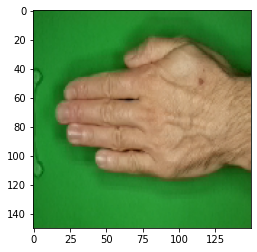

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  # predicting images
  path = fn
  dir_train_gen = train_generator.filenames
  dir_train_class = train_generator.labels
  img = image.load_img(path, target_size=(150,150,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])/255.0
  classes = np.argmax(model.predict(images))
  print(classes)
  
if classes == 0:
  print('paper')
elif classes == 1:
  print('rock')
elif classes == 2:
  print('scissor')
else:
  print('error')